In [1]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

In [74]:
# initialize dataset
data = DataSet(task='social_prediction')

# load behavior
df_behav = data.load_behav()

# load eyetracking
df_eye = data.load_eye()


In [75]:
df_eye_behav = df_eye.merge(df_behav, on=['subj', 'task', 'run_num', 'sess', 'block_iter'])

In [79]:
df_behav['real_start_time'] = df_behav['real_start_time']+5

In [23]:
# merge eye with behav
df_eye_behav = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)

In [59]:
# initialize plotting style
vis.plotting_style()

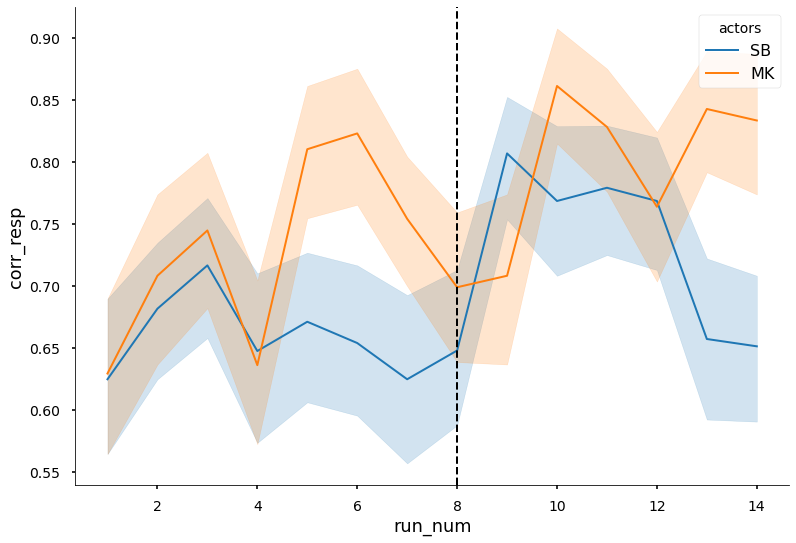

In [95]:
# visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, hue='actors')

In [ ]:
# visualize rt across runs
vis.plot_rt(dataframe=df_behav, hue='condition_name')

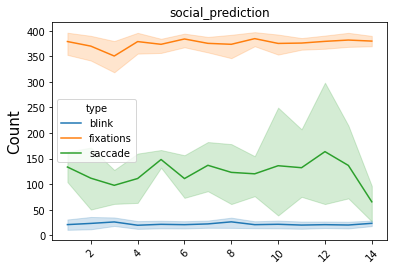

In [41]:
# plot fixation, saccade, blink count across runs
vis.plot_count_events(dataframe=df_eye)

In [37]:
# heatmap

# one subj, one run
for run in range(14):
    tmp = df_eye[(df_eye['subj']=='sIU') & (df_eye['run_num']==run+1) & (df_eye['type']=="fixations")]
    vis.plot_gaze_positions(dataframe=tmp)

#     vis.plot_heatmap(dataframe=tmp)
    plt.title(f'run{run+1}')